[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/tsmclan/ct32-Notebooks.git/HEAD)
<a href="#初始化importers与sklearn数据集">初始化importers与sklearn数据集</a> >>
<a href="#回归Regression">回归与正则化</a> >>
<a href="#分类Classification与交叉验证">分类与交叉验证</a> >>
<a href="#聚类Clustering">聚类</a>

# 关于机器学习库Scikit-Learn

当我们谈论数据科学和数据科学管道时，我们通常谈论的是用于特定目的的数据挖掘，即对数据孕含一些可能的假设建模。机器学习是通过使用现有数据和统计方法来创建适合数据的模型的参数表示来训练一些模型，本质上意味着机器学习算法使用统计过程从示例中学习，然后将其学到的知识应用于未来的输入来预测结果，换言之机器学习使我们能够以有意义的方式处理新数据，预测新数据将在哪里适配我们的模型。

![Overview of Machine Learning](images/ml_overview.jpeg)

监督式学习和非监督式学习是机器学习的经典总结：在监督式学习中，“正确答案”会提前标注，该算法试图根据这些答案来适应决策空间。在无监督式学习中，算法试图将示例分组在一起，通过距离度量推断相似性。现在，机器学习相关技术（如上图所示）还包括半监督学习、迁移学习（transfer learning）、强化学习等；按照任务，机器学习可以分为回归、分类、结构性学习等；按照技术方法分，可以分为线性模型，非线性模型（如深度学习、SVM、决策树、KNN）等。

Scikit-Learn是一个用Python实现的强大的机器学习库，包含许多用于分类、回归、聚类、特征提取和优化的现代机器学习算法（如下图所示），运用Numpy、Scipy和matplotlib可以对中小型数据集进行极快的分析。Scikit-Learn开源，商业上可用，因此它通常是数据科学家工具包中[第一个用于机器学习的工具](https://github.com/DistrictDataLabs/machine-learning/tree/master/notebook)。

![Algorithms in Scikit-Learn](images/sklearn_algorithms.png)

无论是回归（regression）还是分类（classification），都是想建立一个预测模型（输入一个样本, 可以输出一个预测结果），都是监督式学习。两者不同的只是在分类问题中, 预测结果是离散的，即类别; 而在回归问题中预测结果是连续的。所以总得来说，两种问题的学习算法都很类似，在分类问题中用到的学习算法，在回归问题中也能使用。分类问题最常用的学习算法包括SVM (支持向量机) , SGD (随机梯度下降算法), Bayes (贝叶斯估计), Ensemble, KNN 等。而回归问题也能使用SVR, SGD, Ensemble等算法，以及其它线性回归算法。

聚类（clustering）也是分析样本的属性, 有点类似分类, 不同的就是分类问题在预测之前知道到底有几个类别, 而聚类是不知道属性的范围的。所以分类也常常被称为有监督式学习, 而聚类就被称为无监督式学习。由于事先不知道样本的属性范围，聚类只能凭借样本在特征空间的分布来分析样本的属性。这种问题一般更复杂，常用的算法包括 k-means (K-均值), GMM (高斯混合模型) 等。

降维（dimensionality reduction）是机器学习另一个重要的领域, 特征的维数过高, 会增加训练的负担与存储空间, 降维就是希望去除特征的冗余, 用更加少的维数来表示特征。降维算法最基础的就是PCA了, 后面的很多算法都是以PCA为基础演化而来。

<span class="burk">请注意</span>：“实验”一词不仅仅表示学术用途，即使在商业环境中，机器学习通常也是从实验开始的。在进行机器学习项目之前，应至少掌握python编程基础与NumPy、MatplotLib、Pandas库。

## 初始化importers与sklearn数据集

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
# cross_validation used to exist in package sklearn but was deprecated at sklearn 0.21.1
import sklearn
print("Scikit-Learn Ver: {0}".format(sklearn.__version__))
print(sklearn.__doc__)
# from sklearn import cross_validation as cv              # deprecated
from sklearn.model_selection import cross_val_score as cv # now in use
from sklearn.model_selection import train_test_split

# Load the example datasets
#from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import load_linnerud

# Boston house prices dataset (reals, regression)
#boston = load_boston()
#print("{0:>9} {ds[0]:>4} samples {ds[1]:>2} features".format("Boston:", ds=boston.data.shape))

# Iris flower dataset (reals, multi-label classification)
iris   = load_iris()
print("{0:>9} {ds[0]:>4} samples {ds[1]:>2} features".format("Iris:", ds=iris.data.shape))

# Diabetes dataset (reals, regression)
diabetes = load_diabetes()
print("{0:>9} {ds[0]:>4} samples {ds[1]:>2} features".format("Diabetes:", ds=diabetes.data.shape))

# Hand-written digit dataset (multi-label classification)
digits = load_digits()
print("{0:>9} {ds[0]:>4} samples {ds[1]:>2} features".format("Digits:", ds=digits.data.shape))

# Linnerud psychological and exercise dataset (multivariate regression)
linnerud = load_linnerud()
print("{0:>9} {ds[0]:>4} samples {ds[1]:>2} features".format("Linnerud:", ds=linnerud.data.shape))

Scikit-Learn Ver: 1.2.2

Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.

    Iris:  150 samples  4 features
Diabetes:  442 samples 10 features
  Digits: 1797 samples 64 features
Linnerud:   20 samples  3 features


Scikit Learn附带的数据集演示了分类和回归算法的属性，以及数据应该如何适应。它们也很小，很容易训练有效的模型。因此，它们是教学目的的理想选择。数据集模块还包含从[mldata.org](http://mldata.org/)存储库加载数据以及生成随机数据的功能。
[鸢尾花(Iris)数据集入门-CSDN博客](https://blog.csdn.net/q7w8e9r4/article/details/133939309)

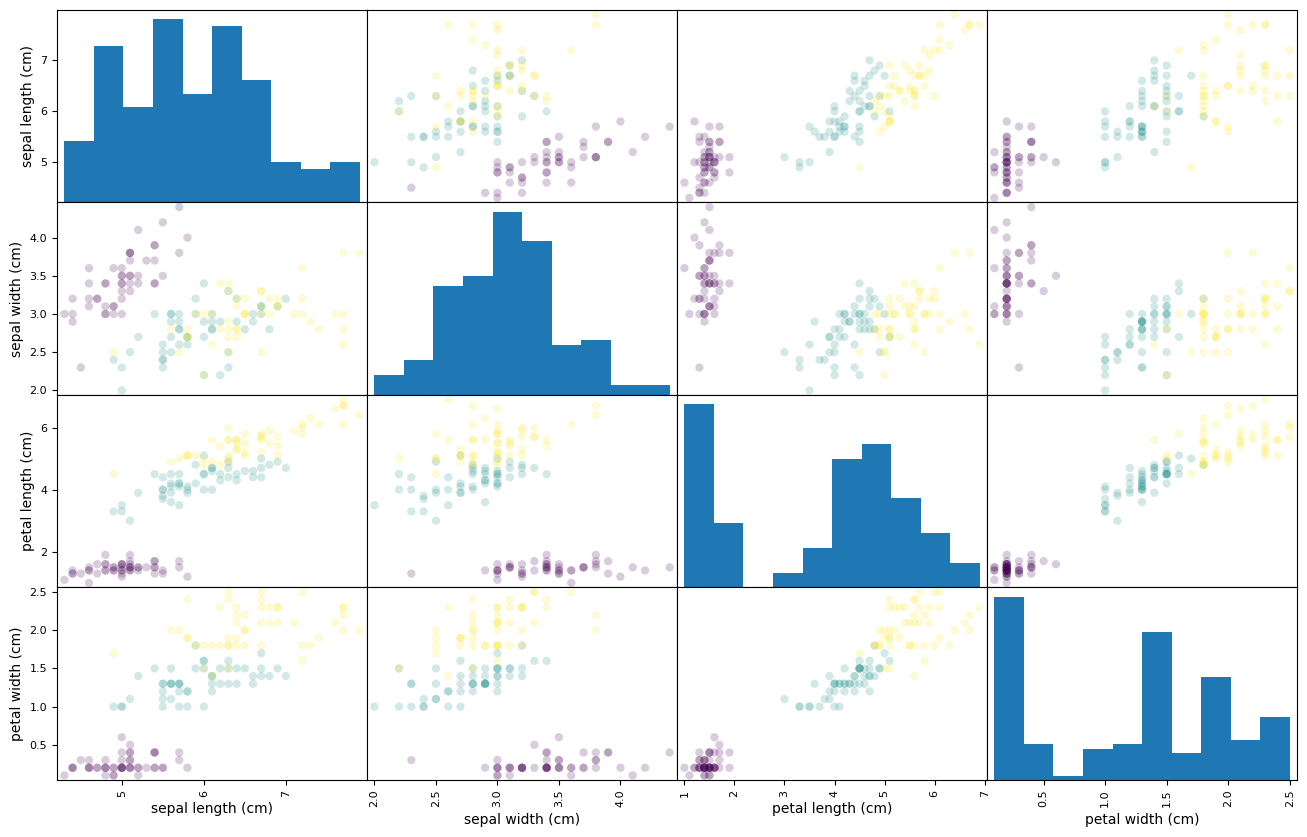

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
X = iris.data
y = iris.target
#四个特征：花萼长度(sepal length)、花萼宽度(sepal width)、花瓣长度(petal length)和花瓣宽度(petal width)
df = pd.DataFrame(X, columns = iris.feature_names)
fig = scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='hist', marker='o', c=y)

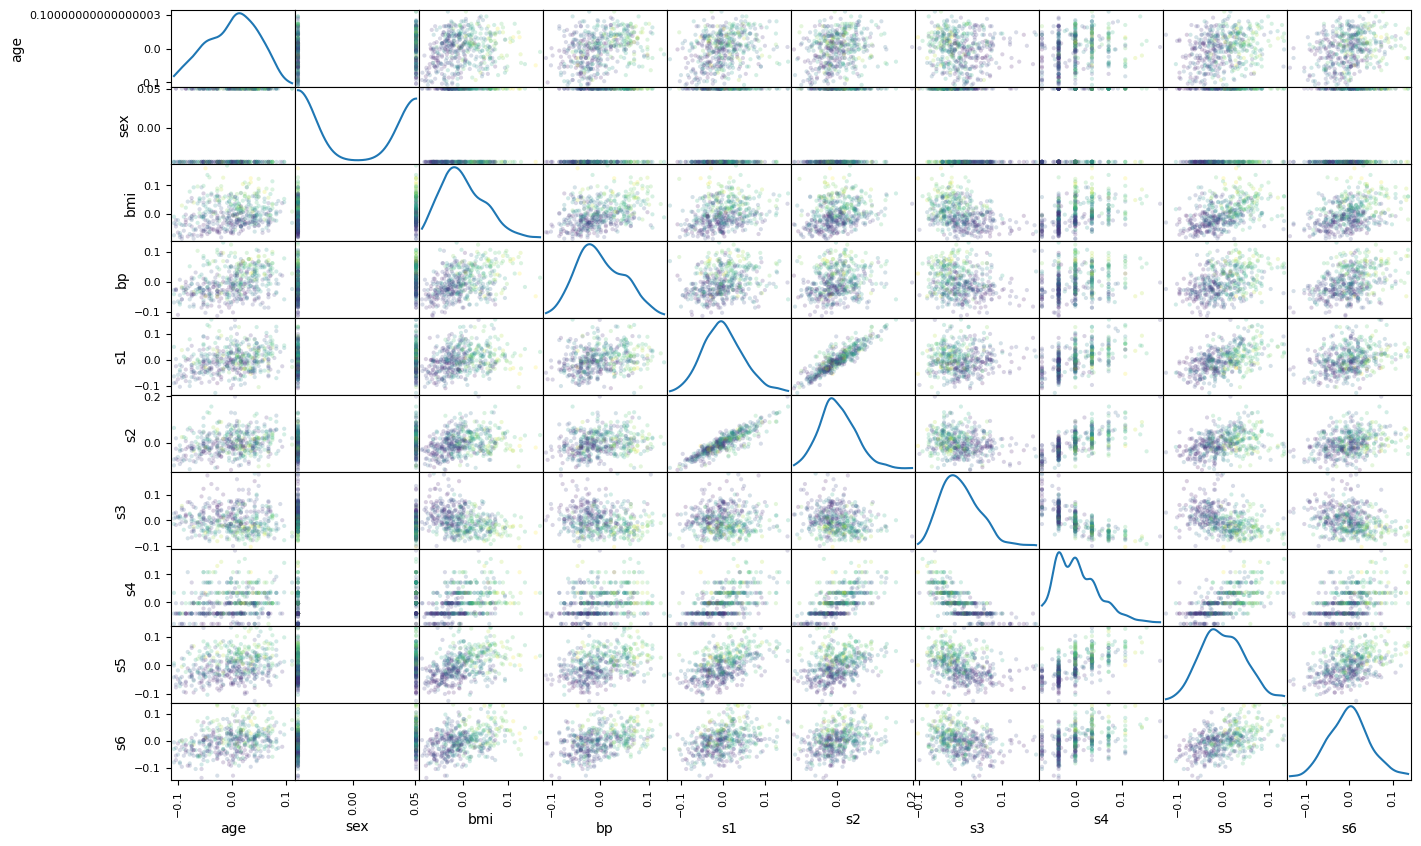

In [3]:
X = diabetes.data
y = diabetes.target
df = pd.DataFrame(X, columns = diabetes.feature_names)
fig = scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='kde', c=y)

# 回归Regression

回归是一种监督学习算法，其中给定连续输入数据，对象将适合能够预测输入特征连续值的函数。

决定系数（Coefficient of Determination），也称为R²，是一个介于0和1之间的数值，用于衡量统计模型预测结果的质量。R²越接近1，模型的预测能力越强。

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

# Fit a given model to diabetes dataset and evaluate it
def train_evaluate(model, prn=True):
    model.fit(X_train, y_train)
    expected  = y_test
    predicted = model.predict(X_test)
    # Evaluate fit of the model
    _mse = mse(expected, predicted)
    _r2 = r2_score(expected, predicted)
    if prn:
        print("Mean Squared Error: {0:0.3f}".format(_mse))
        print("Coefficient of Determination: {0:0.3f}".format(_r2))
    else:
        return _mse, _r2

## 线性回归Linear Regression

线性回归使线性模型（二维线）与数据相匹配。

In [5]:
from sklearn.linear_model import LinearRegression

# Fit regression to diabetes dataset and evaluate it
model = LinearRegression()
train_evaluate(model)

Mean Squared Error: 3180.160
Coefficient of Determination: 0.359


## 感知机Perceptron

一个原始的神经网络，学习输入向量的权重，并通过网络传输权重进行预测。

In [6]:
from sklearn.linear_model import Perceptron

# Fit perceptron to diabetes dataset and evaluate it
model = Perceptron()
train_evaluate(model)

Mean Squared Error: 17680.532
Coefficient of Determination: -2.561


## $k$-近邻回归$k$-Nearest Neighbor Regression

通过查找类似案例并返回平均多数来进行预测。

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Fit regression to diabetes dataset
model = KNeighborsRegressor()
train_evaluate(model)

Mean Squared Error: 4025.524
Coefficient of Determination: 0.189


## 决策树回归Classification and Regression Trees (CART)

为所做的预测对数据进行最佳分离。

In [10]:
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Fit regression to diabetes dataset and evaluate it
model = RandomForestRegressor(n_estimators=60)
train_evaluate(model)

Mean Squared Error: 3897.048
Coefficient of Determination: 0.215


## 随机森林Random Forest

随机林是一种集成方法，使用CART算法创建多个决策树，每个决策树位于数据的不同子集上。创建集成的一般方法是决策树的引导聚合（装袋）。

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model to diabetes dataset and evaluate it
model = RandomForestRegressor(n_estimators=60)
train_evaluate(model)

Mean Squared Error: 3703.699
Coefficient of Determination: 0.254


## 自适应增强Adaboost

自适应增强（AdaBoost）是一种集成方法，它总结了多个决策树所做的预测。添加其他模型，并训练错误预测的实例（增强）

In [12]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
train_evaluate(model)

Mean Squared Error: 3473.446
Coefficient of Determination: 0.300


## 支持向量机Support Vector Machines

使用支持向量机算法（将问题空间转换为更高的维度，以便使用内核方法）对线性函数进行预测。

In [13]:
from sklearn.svm import SVR

model = SVR(gamma='auto')
train_evaluate(model)

Mean Squared Error: 5143.895
Coefficient of Determination: -0.036


## 正则化Regularization

线性回归问题的实质就是训练一个函数$f(X)=\theta^{T} X=Y$，它可以通过最小二乘法来计算，即$\theta=\left(X^{T} X\right)^{-1} X^{T} Y$，但是由于最小二乘法需要计算矩阵的逆，所以有很多的限制，比如矩阵不可逆，又或者矩阵中有多重共线性的情况，会导致计算矩阵的逆的时候行列式接近0，对数据很敏感，还有可能在训练模型的时候有过拟合的情况出现。

正则化方法通过对系数加一个“惩罚项”来减少模型的过度拟合，推导过程参见[线性回归中的正则化 - 知乎](https://zhuanlan.zhihu.com/p/62457875)，阅读[梯度下降，L2,L1,L0范数](https://blog.csdn.net/qq_29409037/article/details/90179633)学习更基础的相关知识。下图中LASSO正则化使用L2范数，Ridge Regression使用L1范数，红色轮廓线是没有正则化损失函数的等高线，中心点$\hat(\beta)$为最优解，天蓝色为正则化的限制区域。L2和L1范数的几何解释是：在正则化的限制之下，L2正则化给出的最优解（等高线与限制区域的交会点）是使解更加靠近原点，也就是说L2正则化能降低参数范数的总和。L1正则化给出的最优解是使解更加靠近某些轴，而其它的轴则为0，所以L1正则化能使得到的参数稀疏化。

![LASSO vs. Ridge Regression](images/regularization.jpg)

### 岭回归Ridge Regression

也称为Tikhonov正则化惩罚系数绝对倍数平方上的最小二乘回归模型（L2范数）

In [14]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
train_evaluate(model)

Mean Squared Error: 3132.421
Coefficient of Determination: 0.369


### LASSO

最小绝对收缩和选择算子（LASSO）惩罚系数绝对大小的最小二乘回归（L1范数）

In [15]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
train_evaluate(model)

Mean Squared Error: 3202.017
Coefficient of Determination: 0.355


# 分类Classification与交叉验证

分类是一个监督式机器学习问题，给定标记的输入数据（带有两个或多个标签），任务是拟合一个可以预测离散输入数据类别的函数。

学习预测函数的参数并在相同数据上进行测试是错误的：一个只重复它刚刚看到的样本标签的模型将获得满分，但无法预测对尚未看到的数据有任何有用的东西。这种情况被称为过拟合，它意味着模型泛化能力差，不能很好地适应实际应用场景。为确保测试的准确性，把数据分为训练数据集和测试数据集，一般按照8:2或7:3来划分，用前者训练模型，训练出参数后再用后者测试模型的准确度。理论上更合理的方案是把数据集划分成三个，此外还要再加一个[交叉验证](#交叉验证Cross-Validation)，它是统计学上的一种用于防止模型过拟合的办法。

注意：运行分类算法之前请[初始化importers与sklearn数据集](#初始化importers与sklearn数据集)。

In [16]:
from sklearn.model_selection import train_test_split

# Fit a given model to iris dataset and evaluate it
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2)
def train_evaluate(model, prn=True):
    model.fit(X_train, y_train)
    expected  = y_test
    predicted = model.predict(X_test)
    if prn:
        print(classification_report(expected, predicted))

## 逻辑回归Logical Regression

适合数据的逻辑模型，并对类别事件的概率（0到1之间）进行预测。逻辑回归在0到1之间进行预测，因此为了对多个类进行分类，使用一对一的方案（每个类一个模型，赢家通吃）。

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto')
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## 线性差异分析LDA

LDA将条件概率密度函数（高斯）与类的属性相匹配。识别函数是线性的。

In [33]:
#from sklearn.lda import LDA  # deprecated at sklearn 0.16
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA()
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 朴素贝叶斯Naive Bayes

使用贝叶斯定理（带有朴素的假设）来模拟每个属性与类的条件关系。

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## $k$-近邻$k$-Nearest Neighbor

通过相似性函数或距离定位相似的实例并平均大多数最相似的实例来进行预测。

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## 决策树Decision Trees

决策树使用CART算法通过进行最适合数据的拆分来进行预测。

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## 支持向量机SVMs

支持向量机（SVM）使用转换问题空间中的点，将类分成组。

In [21]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    print('kernel: {0:<6} ---------------------'.format(kernel))
    if kernel != 'poly':
        model      = SVC(kernel=kernel, gamma='auto')
    else:
        model      = SVC(kernel=kernel, gamma='auto', degree=3)
        
    train_evaluate(model)

kernel: linear ---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

kernel: poly   ---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

kernel: rbf    ---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1      

## 随机森林Random Forest

RF是数据集不同子集上的决策树的集合。该集成是通过自助聚合（bootstrap aggregation）创建的。

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=60)
train_evaluate(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## 交叉验证Cross Validation

CV是统计学上的一种评估统计分析、机器学习算法对独立于训练数据的数据集的泛化能力的实用方法。为了避免过拟合，在进行监督式机器学习实验时，通常的做法是将数据样本切割成较小子集，先在一个训练子集上做学习，然后用验证子集去跑一遍，看验证集的损失函数、分类准确率等参数。等模型训练好之后，最后用测试集再去测试模型的性能。以下是模型训练中典型交叉验证工作流程的流程图。

![CV workflow](images/cv_workflow.png)

通过将可用数据划分为三组，我们大大减少了可用于学习模型的样本数量，然而结果可能取决于一对（训练、验证）集的特定随机选择。[常见的sklean交叉验证方法](https://zhuanlan.zhihu.com/p/267910629)有留余（holdout）、k折（k-fold）、留一（leave one out）和自助采样（bootstrap sampling）四法。参照[Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance)和[sklearn之交叉验证 - 知乎](https://zhuanlan.zhihu.com/p/52515873)等文，最佳（超）参数可以通过[网格搜索grid search：Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)技术确定。

以下示例演示了如何通过拆分数据、拟合模型和连续5次计算分数（每次拆分不同）来估计iris数据集上线性内核支持向量机的准确性：

In [24]:
from sklearn import svm
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
model = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cv(model, X_test, y_test, cv=5, scoring='f1_macro')
print("Accuracy: {0:0.2f} \t\tStandard deviation: {1:0.2f}".format(scores.mean(), scores.std()))
scores.round(3)

Accuracy: 0.97 		Standard deviation: 0.04


array([1.   , 1.   , 1.   , 0.926, 0.915])

当cv参数是整数时，cross_val_score默认使用KFold或StratifiedKFold策略，如果估计器来自ClassifierMixin，则使用后者。

也可以通过传递交叉验证迭代器来使用其他交叉验证策略，例如：

In [25]:
from sklearn.model_selection import ShuffleSplit
from sklearn import svm

n_samples = X_test.shape[0]
_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cv(model, X_test, y_test, cv=_cv, scoring='f1_macro')
print("Accuracy: {0:0.2f} \t\tStandard deviation: {1:0.2f}".format(scores.mean(), scores.std()))
scores.round(3)

Accuracy: 0.99 		Standard deviation: 0.02


array([1.   , 0.944, 1.   , 1.   , 1.   ])

用训练中保留的数据（data held-out from training）测试模型。同等重要地，预处理（如标准化、特征选择等）和类似的数据转换也应该从训练集中学习，并将其应用于保留的数据进行预测，例如：

In [26]:
from sklearn import preprocessing
from sklearn import svm

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test).round(3)

0.933

流水线（pipline）技术使交叉验证的代码编写更容易，例如：

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn import svm

n_samples = X_test.shape[0]
_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='linear', C=1, random_state=42))
score = cv(clf, X_test, y_test, cv=_cv, scoring='f1_macro')
print("Accuracy: {0:0.2f} \t\tStandard deviation: {1:0.2f}".format(scores.mean(), scores.std()))
scores.round(3)

NameError: name 'make_pipeline' is not defined

# 聚类Clustering

聚类算法试图在未标记的数据中找到模式。它们通常分为两大类：质心（查找聚类中心）和分层（查找聚类的聚类）。

为了探索聚类算法，我们必须生成一些虚假的数据集circles, moons, blobs和noise来使用。

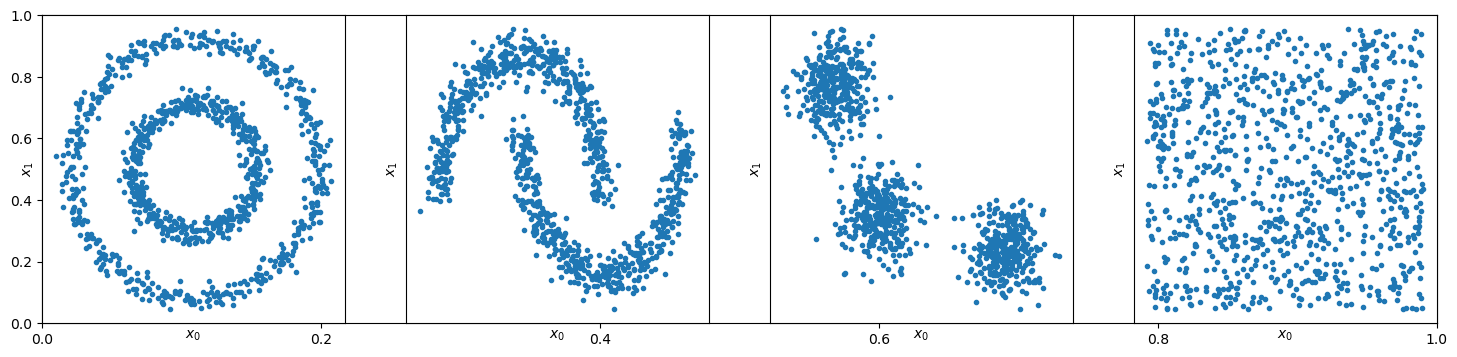

In [28]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

N = 1000 # Number of samples in each cluster

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

circles = make_circles(n_samples=N, factor=.5, noise=.05)
moons   = make_moons(n_samples=N, noise=.08)
blobs   = make_blobs(n_samples=N, random_state=9)
noise   = np.random.rand(N, 2), None

# Let's see what the data looks like!
fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:,0], X[:,1], marker='.')

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

# Train the model and plot the predictions
def train_plot(model):
    fig, axe = plt.subplots(figsize=(18, 4))
    for idx, dataset in enumerate((circles, moons, blobs, noise)):
        X, y = dataset
        X = StandardScaler().fit_transform(X)

        # Fit the model and make predictions
        model.fit(X)
        predictions = model.predict(X)

        # Find centers
        centers = model.cluster_centers_
        center_colors = colors[:len(centers)]
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)

        plt.subplot(1,4,idx+1)
        plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

        plt.xticks(())
        plt.yticks(())
        plt.ylabel('$x_1$')
        plt.xlabel('$x_0$')

    plt.show()

## $k$-均值聚类$k$-Means Clustering

将$N$个样本分区到$k$个集群中，其中每个样本都属于它与邻居最接近平均值的集群。这个问题很难，但有很好的估计。

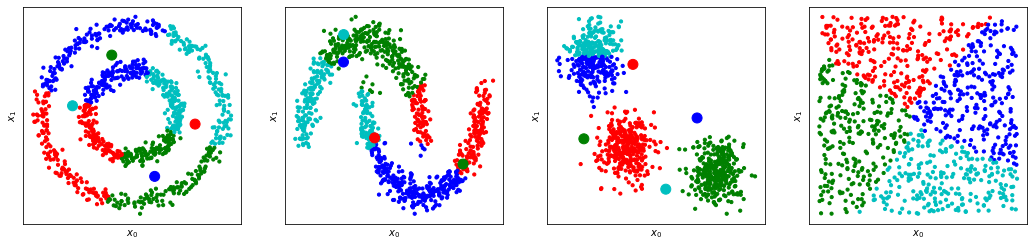

In [11]:
from sklearn.cluster import MiniBatchKMeans

# Fit the model with our algorithm
model = MiniBatchKMeans(n_clusters=4)
train_plot(model)

## 亲和力传播Affinity Propagation

基于数据点之间“消息传递”概念的聚类。与$k$-均值或$k$-medoids等聚类算法不同，AP<span class="burk">不需要</span>在运行算法之前确定或估计集群数量。与$k$-medoids一样，AP找到“示例”，即代表集群的输入集的成员。

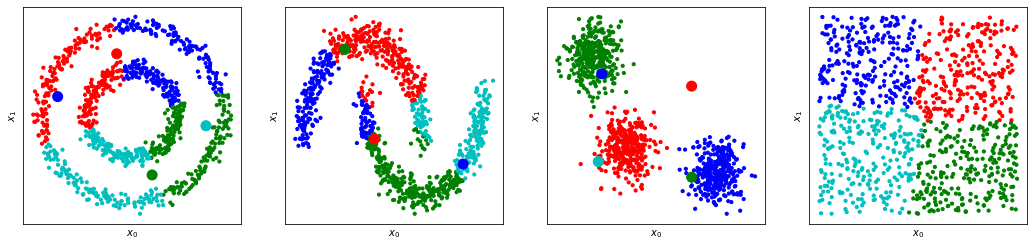

In [12]:
from sklearn.cluster import AffinityPropagation

# Fit the model with our algorithm
model = AffinityPropagation(damping=.9, preference=-200)
train_plot(model)

# 案例：如何更好地开展基于机器学习的实验研究

通过几个问题，先回顾一下我们的Scikit-Learn之旅：

* 回归与分类的联系与区别是什么？
* 分类与聚类的联系与区别是什么？
* 正则化的目的是什么？
* 交叉验证的目的是什么？
* 为什么要把数据集分成训练集和测试集？

“实验”一词不仅仅表示学术用途，即使在商业环境中，机器学习应用开发通常也是从实验开始的。一个完整的机器学习应用项目应包含7步：（1）数据采集和标记，（2）数据清洗，（3）特征选择，（4）模型选择，（5）模型训练和测试，（6）模型性能评估和优化，（7）模型使用。假设我们要开发一个房价评估系统，目标是对一个已知特征的房子价格进行评估预测，那么：

* 以房价评估预测为背景，对其机器学习应用开发的7个步骤进行解释说明。

这7个步骤就像软件开发的“瀑布模型”一样，机器学习应用开发可以通过一系列步骤顺序开展，每个步骤的任务明确。但问题同样存在，即：如果有信息未被覆盖或者发现了问题，那么最好 “返回”上一个步骤或者之前的某个步骤并进行适当的修改完善，而修改是有成本的。

注意步骤（1）很关键，采集什么数据，怎么采集它们，无论时间上还是费用上，这个成本都很高；步骤（3）需要（人工地）逐个分析各个数据特征及其关联；如果应用成熟的算法模型，步骤（4）就很简单；步骤（5）是一个反复修改的“训练-评价”过程；步骤（6）也很关键，因为性能评估包含模型评价和结果分析，它们有很多面向。步骤（5）是一个以交叉验证为代表的不断迭代优化实验代码和模型的过程，以k-折交叉验证为例，它包含以下几步：

1. 将数据集k等分，即k-折；
2. 使用折叠1作为测试集，使用其他折叠的联合作为训练集；
3. 计算测试集的准确性；
4. 步骤2和3重复k次，每次使用不同的折叠作为测试集；
5. 使用平均测试精度作为样本外准确性的估计。

由于流水线（pipline）技术使交叉验证的代码编写更容易，更高级地还可以考虑以下问题：

* 为什么使用OneHotEncoder对类别进行编码？怎么做？
* 如何使用ColumnTransformer将OneHotEncoder应用于选定列？
* 您如何构建和交叉验证一个流水线？
* 如何使用流水线对新数据进行预测？
* 你为什么要使用scikit-learn（而不是pandas）进行数据预处理？


## 数据集下载（数据采集和标记）

<span class="girk">思考的问题</span>：命名？放哪？更新时，为什么要兼容以前的版本？怎么为更新命名？

In [29]:
import os.path as path
import os, requests

# Download dataset from the web and store it to a local path
def download_dataset(fromURL, toPath):
    os.makedirs(path.dirname(toPath), exist_ok=True)
    r = requests.get(fromURL)
    with open(toPath,'wb') as f:
        f.write(r.content)
    r.close()

# download remotely from
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.csv"
# where to store the dataset locally
HOUSING_PATH = path.join("data", path.basename(HOUSING_URL))
download_dataset(HOUSING_URL, HOUSING_PATH)

/var/folders/kd/3126gfj505v0hf761h9t1d2m0000gn/T/ipykernel_12805/3797749064.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  


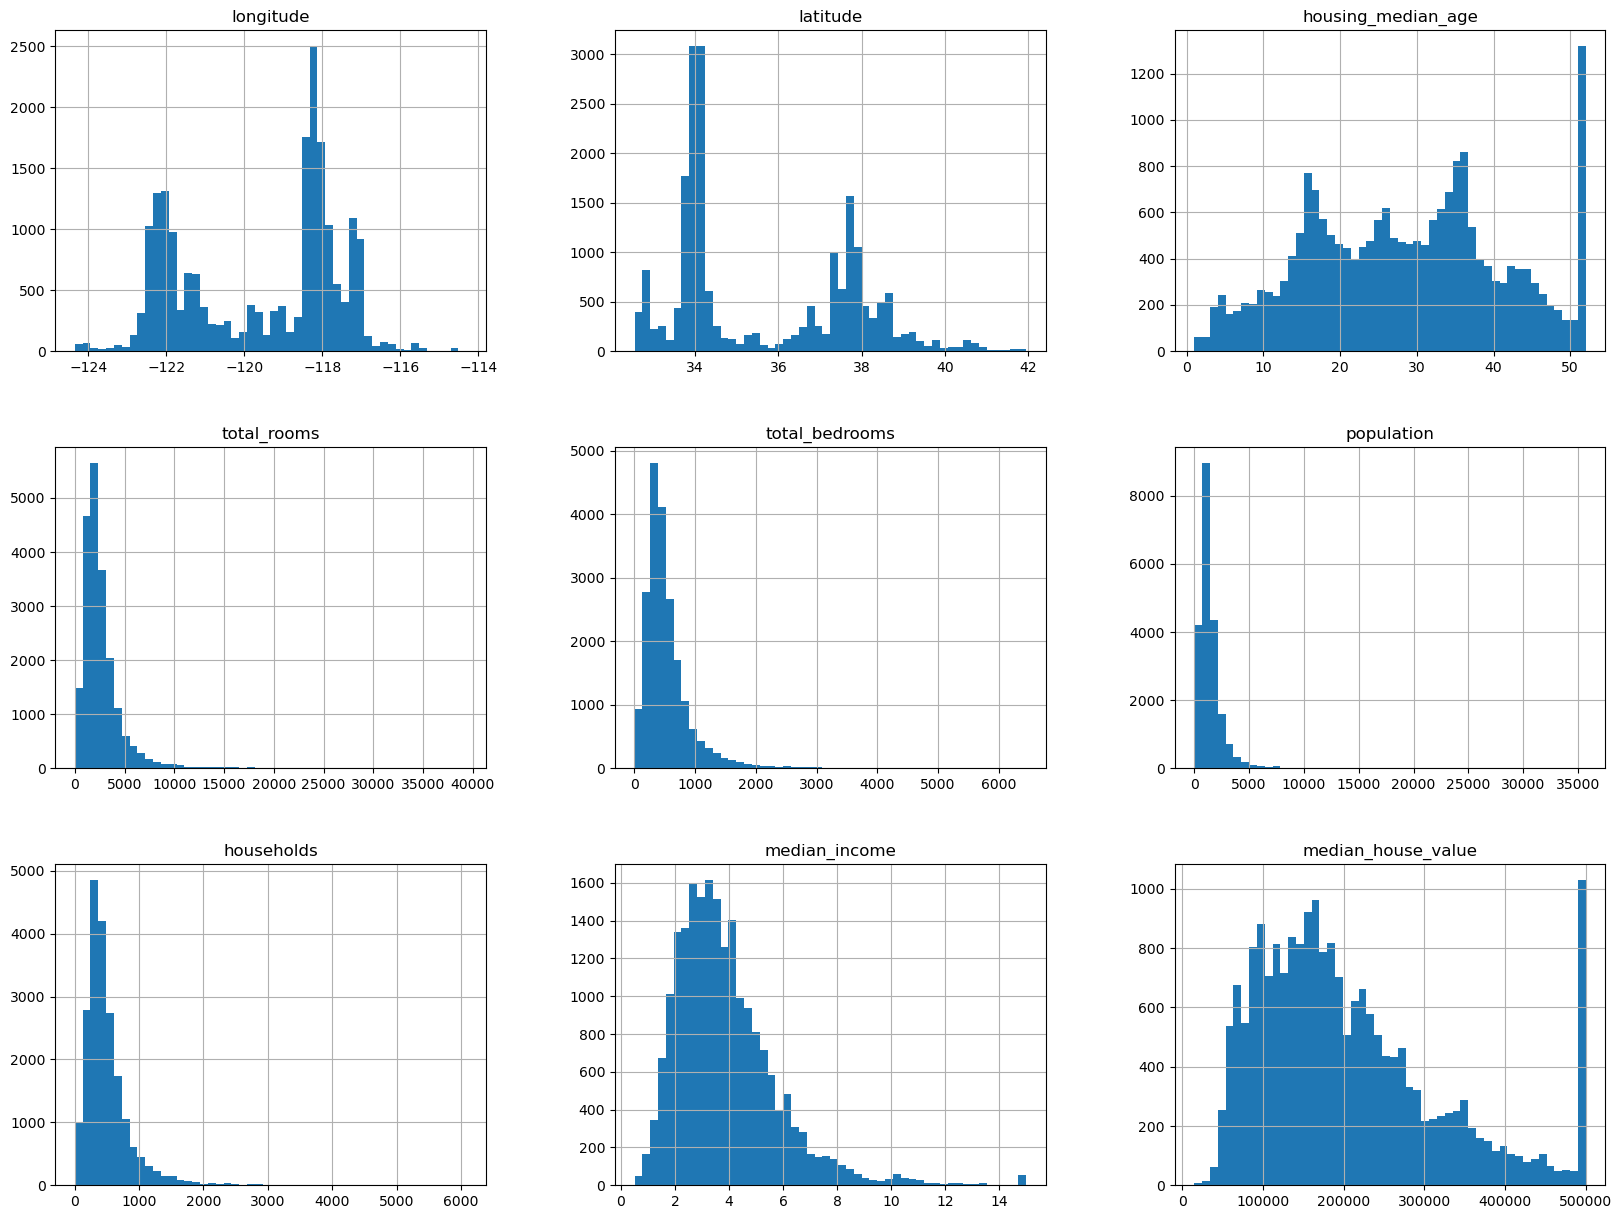

In [30]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# show what the data is like
housing = pd.read_csv("data/housing.csv")
housing.hist(bins=50, figsize=(20,15))
# new a column named as income_cat
# np.ceil向上取整
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 除小于5的值以外都改为5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print(housing.head(n=3))

## 数据清洗

假设我们采集到的数据里，关于房子面积，有包含公摊面积的，有不包含的，这时需要对此进行统一。这个过程称为数据清洗。它还包括去掉重复的数据及噪声数据，让数据具有结构化的特征，以方便作为机器学习算法的输入。

### 填补缺省值

In [ ]:
from sklearn.impute import SimpleImputer as Imputer

#删除房价列后复制给新的变量。该函数默认删除行，加axis=1表示删除列
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
#删除非数据类型的属性
housing_num = housing.drop("ocean_proximity", axis=1)

#建立一个填补缺失的工具imputer，策略是使用中位数
imputer = Imputer(strategy="median")
#将imputer拟合到数据集
imputer.fit(housing_num)
#将缺失值替换为中位数
X = imputer.transform(housing_num)
#将X(这是numpy数组)转换为Pandas的Dataframe数据集类型
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
print(">>>>>>>>>>>>>>>> Housing".format(housing.info(verbose=False)))
print(">>>>>>>>>>>>>>>> Housing imputed".format(housing_tr.info(verbose=False)))

## 特征选择

假设我们采集到了100个房子的特征，通过逐个分析这些特征，最终选择了30个特征作为输入。这个过程称为特征选择。一个选择方法是人工选择，即人工对特征数据进行分析，然后选择合适的特征集合。另一个选择方法是通过算法模型自动完成，例如采用主成分分析（PCA）。

### 按照收入进行分层抽样

n_splits为切割次数，我们按照"income_cat"属性进行切分，所以只用切分一次。test_size是测试集比例，random_state是随机数种子。split方法获得了分类后的索引。

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# remove the temporary column income_cat
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

### 分析数据相关性

使用Pandas创建关联矩阵（correlation matrix)，发现正相关的数据特征。根据数据相干性和可视化，将房价的中位数作为标签（即要预测的东西）

In [ ]:
# have a copy of the stratified 
housing = strat_train_set.copy()
# create a correlation matrix using
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
# get a visual representation of the correlation
housing.plot(kind="scatter", x="median_income",y="median_house_value",alpha=0.1)
#s表示半径，指定为人口数/100
#c表示颜色，指定根据房价变化
#cmap是颜色集，可以自动根据数值大小选定颜色
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
    s=housing["population"]/100, label="population",
    c="median_house_value",  colorbar=True)

# 回顾与展望

* 从事机器学习相关研究的基本知识和技能有哪些？
* 如何更好地开展基于机器学习的实验研究？
* 如何在广度和深度上继续学习钻研？

## 数学基础

数学是机器学习的基础，良好的数学功底可以达到事半功倍的效果。机器学习主要涉及概率与统计、线性代数和微积分等课程，读大学时觉得这些课程等用途不大，当想进入机器学习这一行后，就不免有些后悔了。现在网络资源丰富，视频教程也很多，建议多花些时间再学习一遍，动手实验的过程中回顾这些课程里的数学概念，会突然有醍醐灌顶的感觉，一下子豁然开朗起来。

## 英语

在人工智能应用领域，我国略有领先，但是在基础算法研究及基础架构开发方面，我国还是有差距的，起引领作用的还是美国的研究机构、大学院校和大公司。要想接触到第一手的SOTA（state-of-the-art）资料，必须学好英语。

## 横向对比学习

1. 李航，《统计学习方法》
2. The Elements of Statistical Learning，大而全的算法工具书
3. 视频教程：吴恩达《Machine Learning》